In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

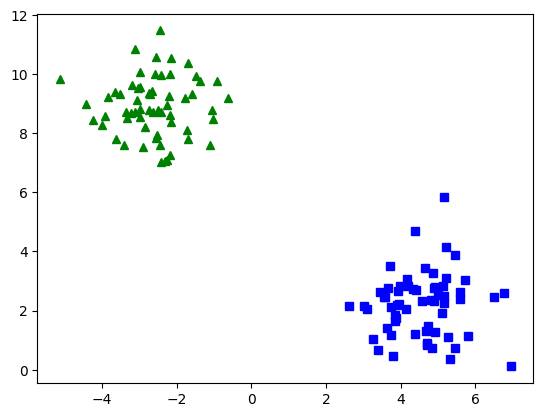

In [389]:
X, y = make_blobs(n_samples=120, centers=2, n_features=2, random_state=42)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()
# taking transpose X for easier calculation
X = X.T
y[y == 0] = -1

In [390]:
class F:
    @staticmethod
    def sign(x):
        if x >= 0:
            return 1
        else:
            return -1

In [391]:
class Perceptron:
    def __init__(self, input_size = 1):
        self.W = np.random.rand(1, input_size)[0]
        self.b = np.random.uniform(0, 3)
    def forward(self, input):
        bias = np.full((1 ,input.shape[1]), self.b)
        return np.matmul(self.W, input) + bias


In [392]:
class Optimizer:
    def __init__(self, model):
        self.model = model
    def update(self, x, y, y_hat):
        if y_hat != y:
            self.model.b += y - y_hat
            self.model.W += (y - y_hat) * x
            return

In [393]:
p = Perceptron(X.shape[0])
optimizer = Optimizer(p)

In [410]:
n_iter = 1000
res = optimizer.model.forward(X)
res = res[0]
print(optimizer.model.W)
print(optimizer.model.b)
for _ in range(n_iter):
    for i in range(X.shape[1]):
        y_hat = F.sign(res[i])
        optimizer.update(X[:, i], y[i], y_hat)
print(optimizer.model.W)
print(optimizer.model.b)

[ 835988.78159743 -727989.52307961]
-3998.063367116265
[ 835988.78159743 -727989.52307961]
-3998.063367116265


In [411]:
miss = 0
for i in range(X.shape[1]):
    y_hat = F.sign(res[i])
    if y_hat != y[i]:
        miss += 1
print(miss)

0
